# Section 10: Linear and Polynomial Regression

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import scipy as sp
from joblib import dump, load

## Linear Regression with NumPy

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot: xlabel='total_spend', ylabel='sales'>

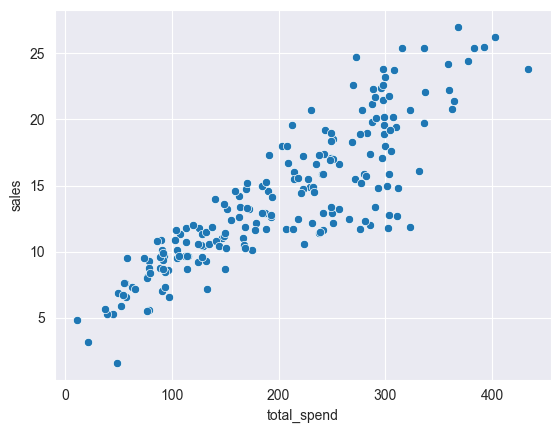

In [6]:
sns.scatterplot(df, x='total_spend', y='sales')

In [7]:
X = df['total_spend']
y = df['sales']

In [8]:
np.polyfit(X, y, 1)

array([0.04868788, 4.24302822])

In [9]:
potential_spend = np.linspace(0, 500, 100)

In [10]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

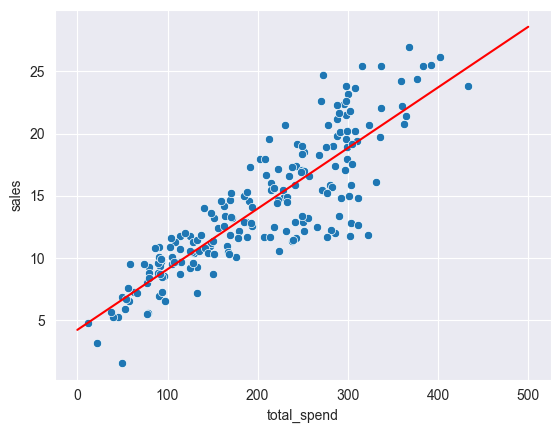

In [11]:
sns.scatterplot(df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red')

In [12]:
spend = 200
predicted_sale = 0.04868788 * spend + 4.24302822
predicted_sale

13.98060422

In [13]:
np.polyfit(X, y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [14]:
pred_sales = 3.07615033e-07 * potential_spend ** 3 + -1.89392449e-04 * potential_spend ** 2 + 8.20886302e-02 * potential_spend + 2.70495053e+00

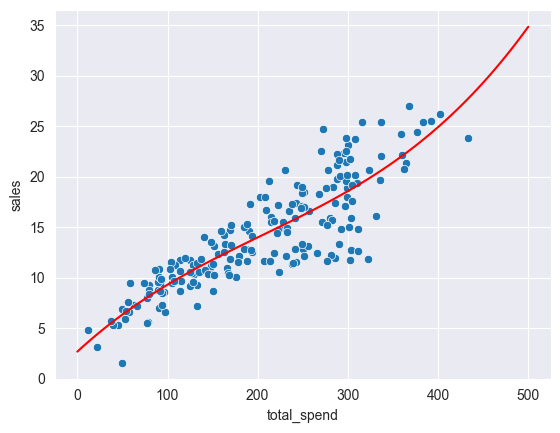

In [15]:
sns.scatterplot(df, x='total_spend', y='sales')
plt.plot(potential_spend, pred_sales, color='red')

In [16]:
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

## Linear Regression with Scikit-learn

In [17]:
df = pd.read_csv('Advertising.csv')

In [18]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


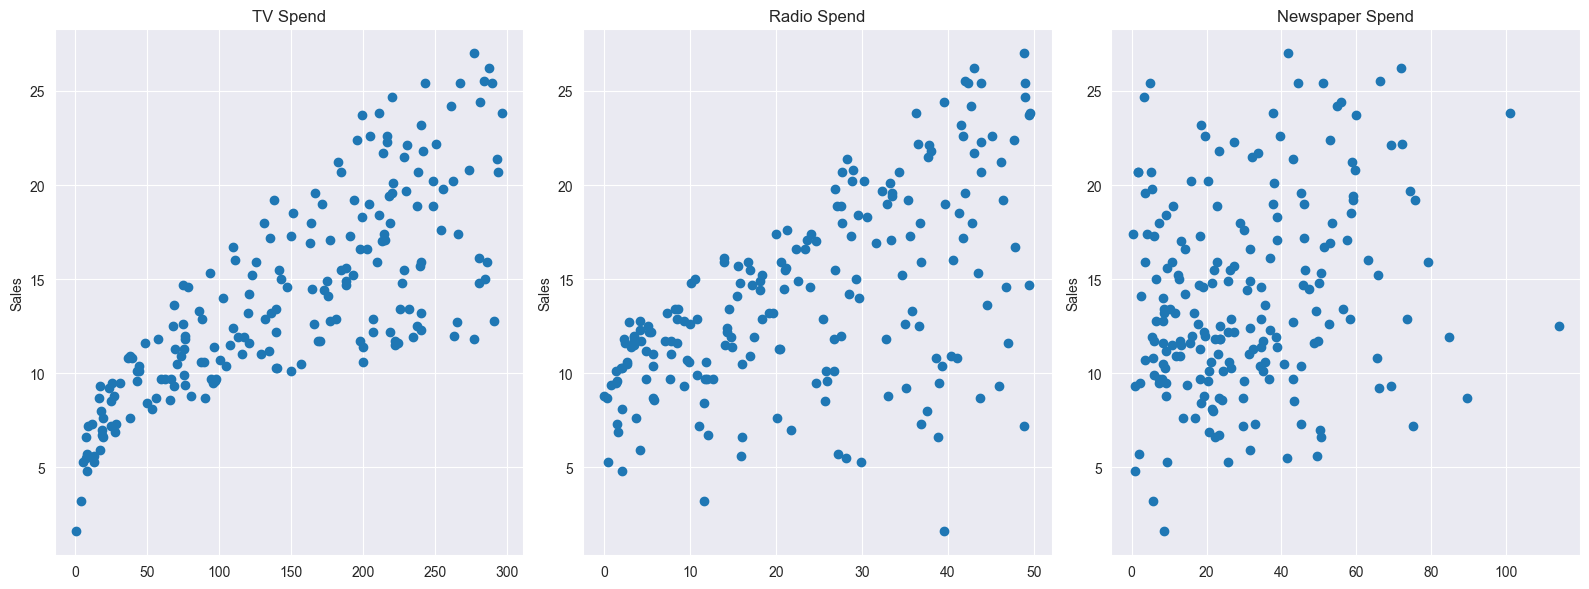

In [19]:
_, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

In [20]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


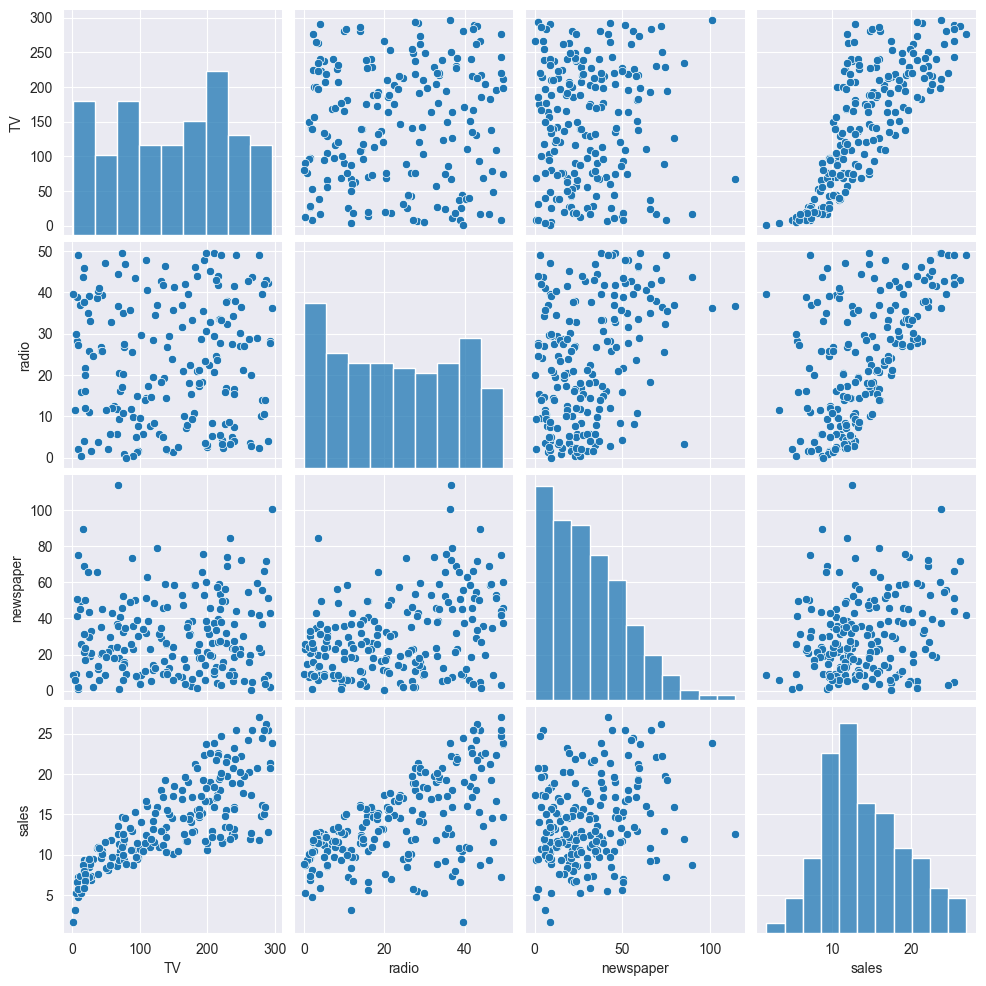

In [21]:
sns.pairplot(df)

In [22]:
X = df.drop('sales', axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [23]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
len(df)

200

In [26]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [27]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [28]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [29]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

In [30]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [31]:
df['sales'].mean()

14.0225

<AxesSubplot: xlabel='sales', ylabel='Count'>

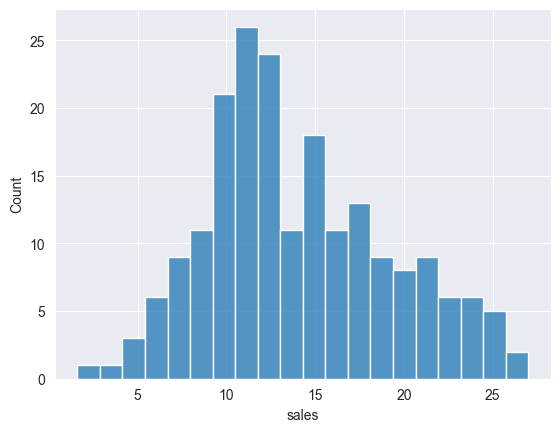

In [34]:
sns.histplot(df, x='sales', bins=20)

In [36]:
mean_absolute_error(y_test, y_pred)

1.213745773614481

In [37]:
mean_squared_error(y_test, y_pred)

2.298716697886379

In [38]:
root_mean_squared_error(y_test, y_pred)

1.5161519375993882

In [41]:
y_resid = y_test - y_pred

In [42]:
y_resid

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

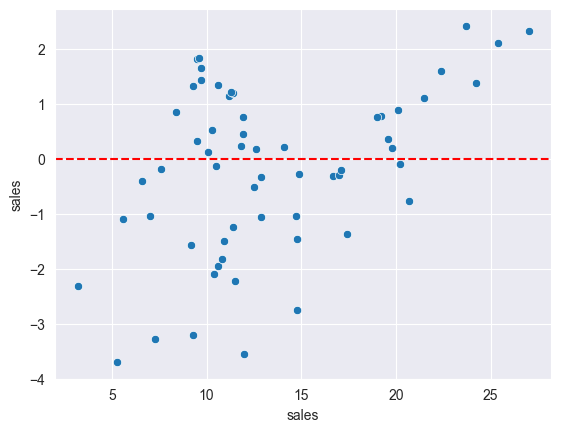

In [46]:
sns.scatterplot(x=y_test, y=y_resid)
plt.axhline(y=0, color='red', ls='--')

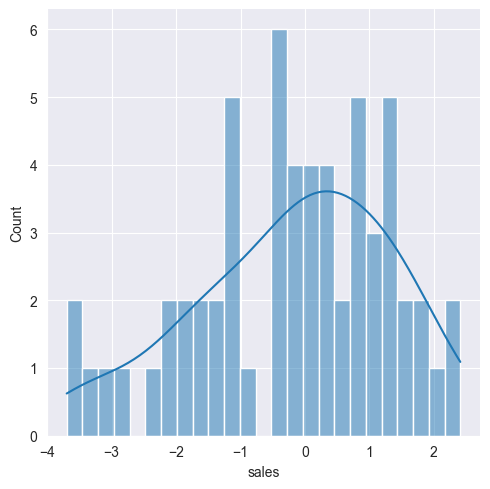

In [50]:
sns.displot(y_resid, bins=25, kde=True)

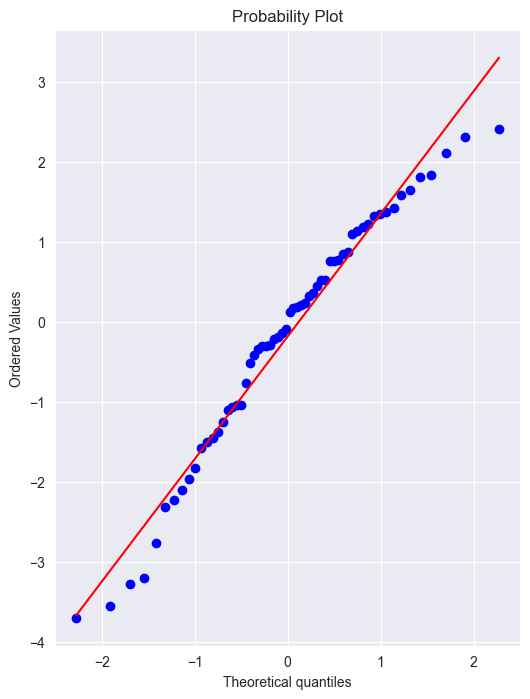

In [52]:
_, ax = plt.subplots(figsize=(6, 8))

_ = sp.stats.probplot(y_resid, plot=ax)

In [54]:
final_model = LinearRegression()

final_model.fit(X, y)

LinearRegression()

In [55]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [56]:
final_model.intercept_

2.9388893694594103

In [57]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [58]:
y_final_pred = final_model.predict(X)
y_final_pred

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

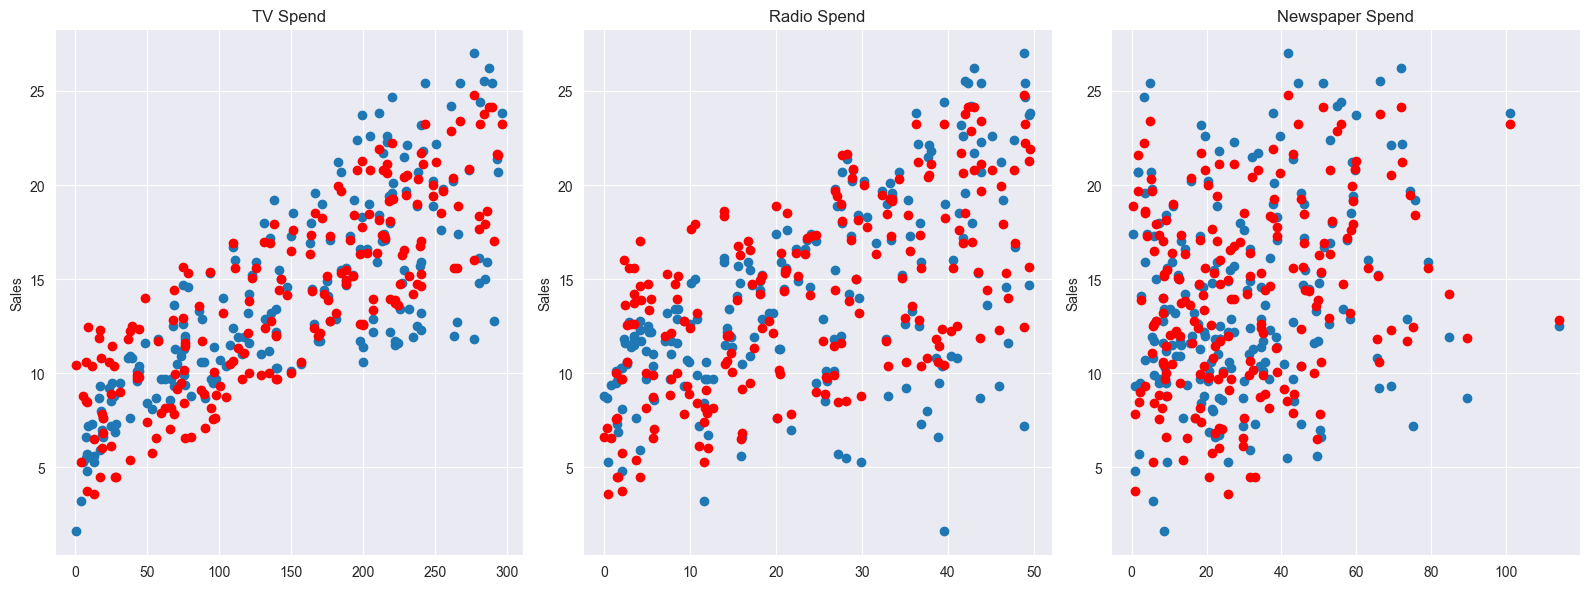

In [60]:
_, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_final_pred, 'o', color='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_final_pred, 'o', color='red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_final_pred, 'o', color='red')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

In [66]:
model_name = 'final_sales_model.joblib'

In [67]:
dump(final_model, model_name)

['final_sales_model.joblib']

In [68]:
loaded_model = load(model_name)

In [69]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [70]:
loaded_model.intercept_

2.9388893694594103

In [71]:
X.shape

(200, 3)

In [82]:
campaign = pd.DataFrame.from_dict({ 'TV': [149], 'radio': [22], 'newspaper': [12] })

In [83]:
loaded_model.predict(campaign)

array([13.893032])

## Polynomial Regression

In [86]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [87]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [89]:
polynomial_converter = PolynomialFeatures(2, include_bias=False)

In [96]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [97]:
poly_features = polynomial_converter.transform(X)

In [98]:
poly_features.shape

(200, 9)

In [94]:
X.shape

(200, 3)

In [100]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [99]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [101]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [103]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [106]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [107]:
y_pred = model.predict(X_test)

In [108]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [109]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)

In [113]:
MAE

0.4896798044803882

In [114]:
MSE

0.4417505510403828

In [115]:
RMSE

0.6646431757269331

In [121]:
train_rmse_errors = []
test_rmse_errors = []

for degree in range(1, 10):
    poly_converter = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse = root_mean_squared_error(y_train, y_train_pred)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [122]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292232,
 0.43393443569020695,
 0.35170836883993495,
 0.2509342985452862,
 0.20953728360568372,
 0.2204686213830993,
 0.2714978862381685,
 0.5132042949936427]

In [123]:
test_rmse_errors

[1.5161519375993882,
 0.6646431757269331,
 0.5803286825228429,
 0.5077742638721316,
 2.575824008063545,
 9.871405162894252,
 41.32984910550321,
 3103.1710844008608,
 12768.352231736037]

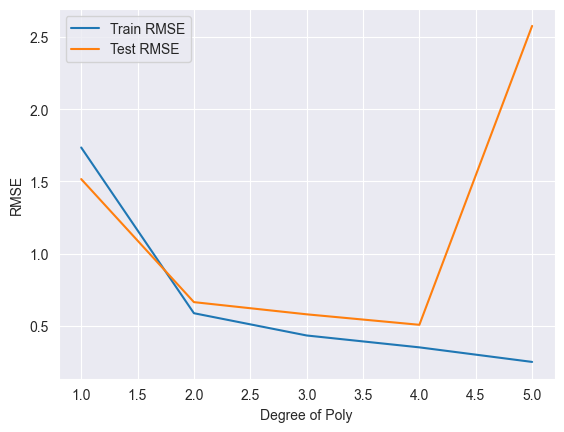

In [127]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1, 6), test_rmse_errors[:5], label='Test RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

In [132]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

full_converted_X = final_poly_converter.fit_transform(X)

In [133]:
final_model = LinearRegression()

final_model.fit(full_converted_X, y)

LinearRegression()

In [134]:
model_name = 'final_poly_model.joblib'
converter_name = 'final_poly_converter.joblib'

dump(final_model, model_name)
dump(final_poly_converter, converter_name)

['final_poly_converter.joblib']

In [135]:
loaded_model = load(model_name)
loaded_converter = load(converter_name)

In [137]:
campaign = pd.DataFrame.from_dict({ 'TV': [149], 'radio': [22], 'newspaper': [12] })

transformed_campaign = loaded_converter.fit_transform(campaign)

In [138]:
loaded_model.predict(transformed_campaign)

array([14.64501014])

## Regularization

In [141]:
df = pd.read_csv('Advertising.csv')

In [143]:
X = df.drop('sales', axis=1)
y = df['sales']

In [144]:
poly_converter = PolynomialFeatures(3, include_bias=False)

In [145]:
X_poly = poly_converter.fit_transform(X)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

In [149]:
scaler = StandardScaler()

In [150]:
scaler.fit(X_train)

StandardScaler()

In [151]:
X_train = scaler.transform(X_train)

In [152]:
X_test = scaler.transform(X_test)

In [154]:
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [164]:
ridge_model = Ridge(10)

In [165]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [166]:
y_pred = ridge_model.predict(X_test)

In [167]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.577440420471417

In [168]:
RMSE = root_mean_squared_error(y_test, y_pred)
RMSE

0.8946386461319659

In [173]:
ridge_cv_model = RidgeCV(scoring='neg_mean_absolute_error')

In [174]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [175]:
ridge_cv_model.alpha_

0.1

In [176]:
y_pred_cv = ridge_cv_model.predict(X_test)

In [177]:
MAE = mean_absolute_error(y_test, y_pred_cv)
MAE

0.42737748843429757

In [178]:
RMSE = root_mean_squared_error(y_test, y_pred_cv)
RMSE

0.618071992694145

In [181]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

In [189]:
lasso_cv_model = LassoCV(eps=0.1)

In [190]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(eps=0.1)

In [191]:
lasso_cv_model.alpha_

0.49430709092258324

In [192]:
y_pred = lasso_cv_model.predict(X_test)

In [195]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.6541723161252868

In [196]:
RMSE = root_mean_squared_error(y_test, y_pred)
RMSE

1.1308001022762548

In [197]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [200]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], max_iter=1000000)

In [201]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [203]:
elastic_cv_model.l1_ratio_

1.0

In [204]:
elastic_cv_model.alpha_

0.004943070909225832

In [206]:
y_pred = elastic_cv_model.predict(X_test)

In [208]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.43350346185900673

In [209]:
RMSE = root_mean_squared_error(y_test, y_pred)
RMSE

0.6063140748984022